In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# import os
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import math
import collections
import time
from scipy import stats

In [2]:
# %matplotlib inline
# from IPython.display import display
# from sklearn import metrics
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_squared_error
# from statistics import stdev

from sklearn import tree

from IPython.display import Image  
from sklearn.externals.six import StringIO  
import pydotplus

e:\new folder (2)\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [3]:
# np.random.seed(1)

In [4]:
def confussion_matrik(actual,predict):
    TP,FP,FN,TN = 0,0,0,0
    for i,val in enumerate(actual):
        if val == 0:
            if val == predict[i]:
                TN += 1
            else:
                FP += 1
        if val == 1:
            if val == predict[i]:
                TP += 1
            else:
                FN += 1
    return TP,FP,FN,TN
 
def acc_sens_spec(actual,predict):
    TP,FP,FN,TN = confussion_matrik(actual,predict)
# akurasi
    if (TP+FP+FN+TN) == 0 :
        accuracy = 0 
    else :
        accuracy = (TP+TN)/(TP+FP+FN+TN)
        
# sensitivity
    if (TP+FN) == 0 :
        sensitivity = 0
    else :
        sensitivity = TP/(TP+FN)
        
# specifity    
    if (TN +FP) == 0 :
        specifity = 0
    else :
        specifity = TN/(TN +FP)
        
# precision
    if (TP+FP) == 0 :
        precision = 0
    else :
        precision = TP/(TP+FP)

# recall
    recall = sensitivity

# f1_score
    if (precision+recall) == 0 :
        f1_score = 0
    else :
        f1_score = 2*((precision*recall)/(precision+recall))  
    
    return accuracy,sensitivity,specifity,precision,recall,f1_score

# Calculate accuracy percentage
def accuracy_metric(actual, predicted):
    #how many correct predictions?
    correct = 0
    #for each actual label
    for i in range(len(actual)):
        #if actual matches predicted label
        if actual[i] == predicted[i]:
            #add 1 to the correct iterator
            correct += 1
    #return percentage of predictions that were correct
    return correct / float(len(actual)) * 100.0

The history saving thread hit an unexpected error (OperationalError('database is locked')).History will not be written to the database.


In [5]:
# confussion_matrik(y,pred)

In [6]:
# accuracy,sensitivity,specifity = acc_sens_spec(y,pred)
# print('acc',accuracy)
# print('sens',sensitivity)
# print('spec',specifity)

In [7]:
# accuracy_metric(y,RF.predict(X))

In [8]:
def cross_val_split(X,fold=2,seed=0):
    np.random.seed(seed)
    n_folds= fold
    size = X.shape[0]/n_folds
    X_idx = list(range(X.shape[0]))
    folds_data= []
    for i in range(n_folds):
#         print(X_idx)
        random_idx = list(np.random.choice(X_idx,int(size),replace=False))
#         print(random_idx)
        X_idx = [idx for idx in X_idx if idx not in random_idx]
#         print(X_idx)

        folds_data.append(random_idx)
#         print("--")
    return folds_data

def kfold_cross_validation(model,X,y, n_fold=2, n_seed=0):
    folds = cross_val_split(X,fold=n_fold,seed=n_seed)
    fold_result =[]
    for i in range(len(folds)):
    #     print(i)
        train = []
        for j in range(len(folds)):
            if j != i:
                train = train + folds[j]
        test = folds[i]

        X_train = X.iloc[train,:].reset_index(drop=True)
        y_train = y[train].reset_index(drop=True)

        X_test = X.iloc[test,:].reset_index(drop=True)
        y_test = y[test].reset_index(drop=True)


        t0 = time.time()
        model.fit(X_train, y_train)
        t1 = time.time()
        waktu = t1 - t0

        predict = model.predict(X_test)
        accuracy,sensitivity,specifity,precision,recall,f1_score = acc_sens_spec(y_test,predict)

        result = [accuracy,sensitivity,specifity,precision,recall,f1_score,waktu]
        fold_result.append(result)
        
    return fold_result

In [9]:
from sklearn.decomposition import PCA
import pylab as pl
def plot_this(X_rs,y_rs,method):
  # Use principal component to condense the 10 features to 2 features
  pca = PCA(n_components=2).fit(X_rs)
  pca_2d = pca.transform(X_rs)
  # Assign colors
  for i in range(0, pca_2d.shape[0]):
    if y_rs[i] == 0:
      c1 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='r', marker='o')
    elif y_rs[i] == 1:
      c2 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='g', marker='*')  
  pl.legend([c1, c2], ['Class 1', 'Class 2'])
  pl.title(method)
  pl.axis([-4, 5, -4, 4])  # x axis (-4,5), y axis (-4,4)
  pl.show()
    


## ---------

In [10]:
##read data

df = pd.read_csv('data/creditcard_ulb.csv',sep=",")
# df = pd.read_csv('data/sample_data.csv',sep=",")

df0 = df.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [11]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [12]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [13]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

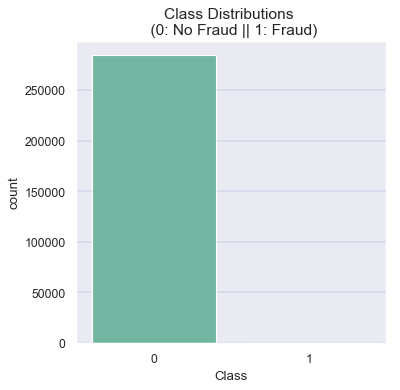

In [14]:
plt.figure(1,figsize=(5, 5), dpi=80)
plt.grid(color='b', linestyle='-', linewidth=0.2)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)
sns.countplot('Class', data=df,palette='Set2')


In [15]:
count = 0
for a in df.columns[1:]:
    if df[a].isnull().sum() > 0 :
#         print(a)
        count+=1
count

0

In [16]:
# from imblearn.under_sampling import (RandomUnderSampler, 
#                                      ClusterCentroids,
#                                      TomekLinks,
#                                      NeighbourhoodCleaningRule,
#                                      NearMiss)

In [17]:
# # Since most of our data has already been scaled we should scale the columns that are left to scale (Amount and Time)
# from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

# # RobustScaler is less prone to outliers.

# std_scaler = StandardScaler()
# rob_scaler = RobustScaler()
# minmax_scaler = MinMaxScaler()

# # df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
# # df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

# df['scaled_amount'] = minmax_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
# df['scaled_time'] = minmax_scaler.fit_transform(df['Time'].values.reshape(-1,1))

# df.drop(['Time','Amount'], axis=1, inplace=True)

# scaled_amount = df['scaled_amount']
# scaled_time = df['scaled_time']

# df.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
# df.insert(0, 'scaled_amount', scaled_amount)
# df.insert(1, 'scaled_time', scaled_time)

# # Amount and Time are Scaled!

# df.head()

In [18]:
# Since our classes are highly skewed we should make them equivalent in order to have a normal distribution of the classes.

# Lets shuffle the data before creating the subsamples
df_copy = df.copy()
# df_copy = df_copy.sample(frac=1)

# amount of fraud classes 492 rows.
fraud_df = df_copy.loc[df_copy['Class'] == 1]
non_fraud_df = df_copy.loc[df['Class'] == 0][:492]
non_fraud_df = df_copy.loc[df_copy['Class'] == 0].sample(n=492,random_state=1)

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
df_new = normal_distributed_df.sample(frac=1, random_state=1)
df_new = df_new.reset_index()
df_new = df_new.drop('index', axis=1)
df_new.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,128627.0,-0.865285,-0.979506,2.587540,-2.781144,-0.887336,-0.579689,-0.976755,0.132058,-1.658263,...,-0.106978,-0.010528,-0.211955,0.021026,0.358237,-0.209483,0.062051,0.074730,8.00,0
1,70536.0,-2.271755,-0.457655,-2.589055,2.230778,-4.278983,0.388610,0.102485,0.813128,-1.092921,...,1.096342,0.658399,1.711676,0.333540,0.538591,-0.193529,0.258194,0.247269,824.83,1
2,166831.0,-2.027135,-1.131890,-1.135194,1.086963,-0.010547,0.423797,3.790880,-1.155595,-0.063434,...,-0.315105,0.575520,0.490842,0.756502,-0.142685,-0.602777,0.508712,-0.091646,634.30,1
3,75987.0,0.531678,-1.108844,0.276972,0.386453,-1.038906,-0.810526,0.395582,-0.322635,0.068460,...,0.000589,-0.824566,-0.174821,0.479535,-0.094335,0.698329,-0.130716,0.083227,386.60,0
4,136908.0,1.878626,0.162765,-0.167433,3.465196,0.197332,1.157212,-0.676783,0.473890,-0.386278,...,-0.217428,-0.785738,0.406279,-0.056071,-0.560484,-0.388620,-0.012717,-0.038421,5.99,0


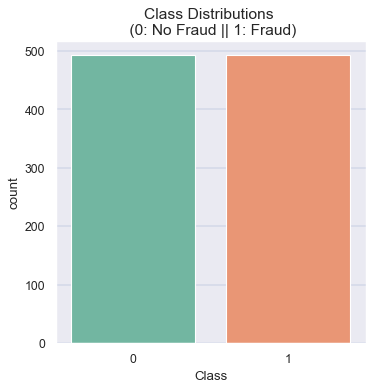

In [19]:
plt.figure(1,figsize=(5, 5), dpi=80)
plt.grid(color='b', linestyle='-', linewidth=0.2)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)
sns.countplot('Class', data=df_new,palette='Set2')

In [20]:
# X = df.drop('Class', axis=1)
# y = df['Class'].copy()

In [21]:
X_new = df_new.drop('Class', axis=1)
y_new = df_new['Class'].copy()

In [22]:
y_new.value_counts()

1    492
0    492
Name: Class, dtype: int64

In [23]:
X_new.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

In [24]:
# from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

# # RobustScaler is less prone to outliers.

# std_scaler = StandardScaler()
# rob_scaler = RobustScaler()
# minmax_scaler = MinMaxScaler()

# X_neww = minmax_scaler.fit_transform(X_new)
# X_new = pd.DataFrame(X_neww, columns=X_new.columns)
# X_new.tail()

# # SKLearn


In [25]:
from sklearn.ensemble import RandomForestClassifier
n_tree = 10
clf = RandomForestClassifier(random_state=1,n_estimators=n_tree, max_features='sqrt')
clf.fit(X_new,y_new)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [26]:
from sklearn.tree import DecisionTreeClassifier
clf_DT = DecisionTreeClassifier(random_state=1)
clf_DT.fit(X_new,y_new)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')

In [27]:
def run_skenarion_1 (clf,X,y,kfolds):
    CV_SKLearn = kfold_cross_validation(clf,X,y,n_fold=kfolds,n_seed=1)
    df_result = pd.DataFrame(data= CV_SKLearn, columns=['Akurasi','Sensitivity','Specifity','precision','recall','f1_score','Waktu'])

    df_result.insert(loc=0, column='No', value=list(range(1,df_result.shape[0]+1)))
    df_result = df_result.set_index('No')

    del df_result.index.name

    df_result = df_result.append(df_result.describe()[1:2])
    
    return df_result
# result_SKLearn = result_SKLearn.append('')

In [28]:
result_SKLearn = run_skenarion_1(clf,X_new,y_new,5)
result_SKLearn

,Akurasi,Sensitivity,Specifity,precision,recall,f1_score,Waktu
1,0.918367,0.861702,0.970588,0.964286,0.861702,0.910112,0.046879
2,0.933673,0.915094,0.955556,0.960396,0.915094,0.937198,0.050232
3,0.964286,0.936842,0.990099,0.988889,0.936842,0.962162,0.032574
4,0.913265,0.870968,0.951456,0.941860,0.870968,0.905028,0.031255
5,0.933673,0.891089,0.978947,0.978261,0.891089,0.932642,0.031376
mean,0.932653,0.895139,0.969329,0.966738,0.895139,0.929429,0.038463


In [29]:
result_SKLearn = run_skenarion_1(clf_DT,X_new,y_new,5)
result_SKLearn

,Akurasi,Sensitivity,Specifity,precision,recall,f1_score,Waktu
1,0.862245,0.840426,0.882353,0.868132,0.840426,0.854054,0.031386
2,0.882653,0.886792,0.877778,0.895238,0.886792,0.890995,0.015618
3,0.923469,0.926316,0.920792,0.916667,0.926316,0.921466,0.031247
4,0.882653,0.903226,0.864078,0.857143,0.903226,0.879581,0.031245
5,0.918367,0.940594,0.894737,0.904762,0.940594,0.922330,0.031258
mean,0.893878,0.899471,0.887947,0.888388,0.899471,0.893685,0.028151


In [30]:
# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

clf_KNN = KNeighborsClassifier(),
clf_SVM = SVC(),
clf_NB = GaussianNB(),
clf_DT_ = DecisionTreeClassifier(random_state=1),
clf_RF = RandomForestClassifier(random_state=1,n_estimators=10)
##skenario 
skenario_1 = {}
skenario_1['1'] = clf_KNN,
skenario_1['2'] = clf_SVM,
skenario_1['3'] = clf_NB,
skenario_1['4'] = clf_DT_,
skenario_1['5'] = clf_RF

In [31]:
for i in skenario_1:
    
    if isinstance(skenario_1[i], tuple) :
        clf_skenario = skenario_1[i][0][0]
    else :
        clf_skenario = skenario_1[i]
#     print('komposisi', i)

    
    result_SKLearn = run_skenarion_1(clf_skenario,X_new,y_new,5)
#     print(result_SKLearn)
    
    nama_file = 'hasil/skenario1/random/komposisi999.csv'
    nama_file = nama_file.replace('999',str(i))

    result_SKLearn.to_csv(nama_file, sep=';',index=False)
                


e:\new folder (2)\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
e:\new folder (2)\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
e:\new folder (2)\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
e:\new folder (2)\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gam

In [32]:
df_result = pd.DataFrame()
for i in skenario_1:
    nama_file = 'hasil/skenario1/random/komposisi999.csv'
    nama_file = nama_file.replace('999',str(i))
    df_komposisi = pd.read_csv(nama_file,sep=";")
    df_result = df_result.append(df_komposisi.iloc[5:,:])
    
df_result.insert(loc=0, column='No', value=list(range(df_result.shape[0])))
df_result = df_result.set_index('No')

del df_result.index.name

df_result.to_csv('hasil/skenario1/random/result.csv', sep=';',index=False)
df_result

,Akurasi,Sensitivity,Specifity,precision,recall,f1_score,Waktu
0,0.652041,0.643023,0.663599,0.656362,0.643023,0.648069,0.180763
1,0.544898,0.087760,1.000000,1.000000,0.087760,0.161051,0.319105
2,0.865306,0.745954,0.983404,0.979102,0.745954,0.846334,0.035864
3,0.893878,0.899471,0.887947,0.888388,0.899471,0.893685,0.028126
4,0.932653,0.895139,0.969329,0.966738,0.895139,0.929429,0.043752


In [33]:
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]
fitur_importance =[]
for f in range(X_new.shape[1]):
    if  importances[indices[f]] > 0 :
        fitur_importance.append([X_new.columns[indices[f]],importances[indices[f]]])
        print("%2d) %-*s %f" % (f + 1, 30,
        X_new.columns[indices[f]],
        importances[indices[f]]))

 1) V14                            0.191396
 2) V4                             0.156735
 3) V17                            0.154208
 4) V12                            0.153089
 5) V11                            0.075608
 6) V2                             0.051632
 7) V10                            0.038917
 8) V7                             0.015483
 9) V20                            0.014762
10) V21                            0.013873
11) V19                            0.012698
12) V8                             0.011657
13) V6                             0.010132
14) V27                            0.009422
15) V3                             0.007821
16) V26                            0.007501
17) V9                             0.007076
18) Amount                         0.007075
19) V13                            0.006597
20) V15                            0.006509
21) V23                            0.006476
22) V22                            0.006006
23) V1                          

In [34]:
df_FI = pd.DataFrame(data=fitur_importance,columns=['fitur','value'])
# np.array(df_FI['fitur'])
df_FI

,fitur,value
0,V14,0.191396
1,V4,0.156735
2,V17,0.154208
3,V12,0.153089
4,V11,0.075608
5,V2,0.051632
6,V10,0.038917
7,V7,0.015483
8,V20,0.014762
9,V21,0.013873


In [35]:
# dot_data = StringIO()  
# tree.export_graphviz(clf.estimators_[8], out_file=dot_data,  
#                          feature_names=X_new.columns)  
# graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
# Image(graph.create_png())

In [36]:
# dot_data = StringIO()  
# tree.export_graphviz(clf_DT,out_file=dot_data,feature_names=X_new.columns)  
# graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
# Image(graph.create_png())